##### Fake news detection

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df_train.shape

(20800, 5)

label = 1 Not Fake News,Label = 0 Fake News

In [4]:
df_train = df_train.drop(['title','author'],axis=1)
df_train.head()

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df_train.columns

Index(['id', 'text', 'label'], dtype='object')

Creating a function to convert the text in lowercase, remove the extra space, special chr., url and links.

In [6]:
def word_drop(text):
   
    text = text.lower()
  
    text = re.sub(r'[!]+', '!', text)
    text = re.sub(r'[?]+', '?', text)
    text = re.sub(r'[.]+', '.', text)
    text = re.sub(r"'", "", text)
    text = re.sub(r"'s", "", text)
    text = re.sub('\s+', ' ', text).strip()
    text = re.sub(r'&amp;?', r'and', text)
    text = re.sub(r'[:"$%&\*+,-/:;<=>@\\^_`{|}~]+', '', text)  
    return text

change the text to str

In [7]:
df_train['text'] = df_train['text'].apply(str)

apply the word_drop func.

In [8]:
df_train['text'] = df_train['text'].apply(word_drop)

In [9]:
df_train.head()

,id,text,label
0,0,house dem aide we didn’t even see comey’s lett...,1
1,1,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired october 29 2...,1
3,3,videos 15 civilians killed in single us airstr...,1
4,4,print an iranian woman has been sentenced to s...,1


determine dependent and independent var.

In [10]:
x = df_train['text']
y = df_train['label'] 

split train and test 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Logistic Regression

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer()
xvec_train = vectorizer.fit_transform(x_train)
xvec_test = vectorizer.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
LR = LogisticRegression()
LR.fit(xvec_train,y_train)

LogisticRegression()

In [16]:
pred_LR = LR.predict(xvec_test)

In [17]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3141
           1       0.95      0.95      0.95      3099

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



# Classification Decision Tree 

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DT = DecisionTreeClassifier()
DT.fit(xvec_train,y_train)

DecisionTreeClassifier()

In [20]:
pred_DT = DT.predict(xvec_test)

In [21]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3141
           1       0.90      0.90      0.90      3099

    accuracy                           0.90      6240
   macro avg       0.90      0.90      0.90      6240
weighted avg       0.90      0.90      0.90      6240



# Submmision File

In [22]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [23]:
df_test['text'] = df_test['text'].apply(str)
df_test['text'] = df_test['text'].apply(word_drop)
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,palo alto calif — after years of scorning the ...
1,20801,Russian warships ready to strike terrorists ne...,NaN,russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,videos #nodapl native american leaders vow to ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,if at first you don’t succeed try a different ...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 views 0 comments 0 likes for the...


In [24]:
new_test=df_test['text']
new_xvec_test = vectorizer.transform(new_test)
pred_LR = LR.predict(new_xvec_test)
pred_DT = DT.predict(new_xvec_test)
submit = pd.read_csv('submit.csv')
submit['label_LR'] =  pred_LR
submit['label_DT'] = pred_DT

submit.to_csv("submission.csv" ,index=False)
    

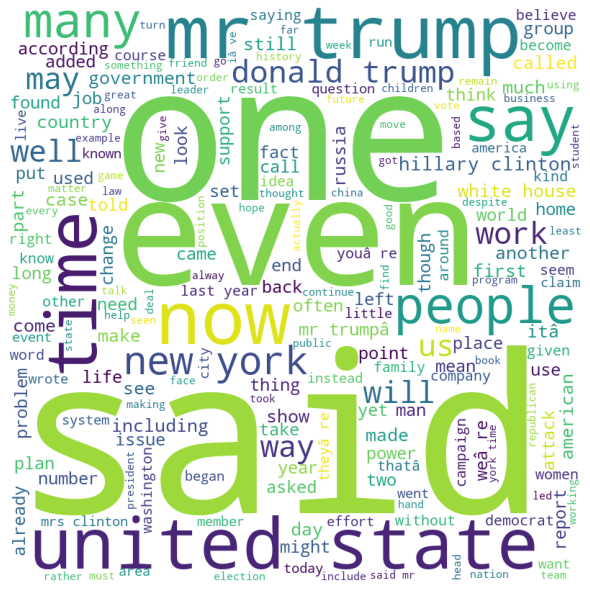

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv(r"train.csv", encoding ="latin-1")
  
comment_words = ''
stopwords = set(STOPWORDS)
df.text = df.text.apply(str)  
# iterate through the csv file
for val in df.text:
    
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()